In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model

from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings("ignore")

In [57]:
from keras.models import load_model
ANNmodel = load_model('./Models')

ANNmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                39768     
                                                                 
 dense_1 (Dense)             (None, 24)                600       
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 40393 (157.79 KB)
Trainable params: 40393 (157.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [3]:
data = pd.read_csv('final_cleaned.csv')
data.head()

,bathrooms,bedrooms,price,square_feet,time,state_AK,state_AL,state_AR,state_AZ,state_CA,...,Gym,TV,Hot Tub,Tennis,Wood Floors,View,Alarm,Doorman,Luxury,Golf
0,1.0,0.0,790,0.000000,2019-12-26 11:23:35,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,425,0.000125,2019-12-22 12:17:43,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.0,1390,0.000150,2019-12-26 11:23:30,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0.0,925,0.000376,2019-12-18 11:15:43,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0.0,880,0.000602,2019-12-26 11:23:21,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
unfair_copy = data.copy()
data['fairness'] = ['fair'] * len(data)

In [39]:
np.random.seed = 4
unfair_copy['price'] = unfair_copy['price'] * np.random.uniform(1.5, 2) 
unfair_copy['price'] = unfair_copy['price'].apply(int)
unfair_copy['fairness'] = ['unfair'] * len(unfair_copy)
unfair_copy.head()

,bathrooms,bedrooms,price,square_feet,time,state_AK,state_AL,state_AR,state_AZ,state_CA,...,TV,Hot Tub,Tennis,Wood Floors,View,Alarm,Doorman,Luxury,Golf,fairness
0,1.0,0.0,1102496,0.000000,2019-12-26 11:23:35,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,unfair
1,1.0,1.0,592368,0.000125,2019-12-22 12:17:43,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,unfair
2,1.0,0.0,1940414,0.000150,2019-12-26 11:23:30,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,unfair
3,1.0,0.0,1290574,0.000376,2019-12-18 11:15:43,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,unfair
4,1.0,0.0,1227634,0.000602,2019-12-26 11:23:21,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,unfair


In [43]:
fairness_data = pd.concat([data, unfair_copy], axis=0)
fairness_data = fairness_data.sample(frac=1).reset_index(drop=True)

In [44]:
fairness_data

,bathrooms,bedrooms,price,square_feet,time,state_AK,state_AL,state_AR,state_AZ,state_CA,...,TV,Hot Tub,Tennis,Wood Floors,View,Alarm,Doorman,Luxury,Golf,fairness
0,1.0,2.0,1624911,0.021479,2019-12-22 11:55:31,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,unfair
1,1.0,1.0,1451,0.012908,2019-12-26 11:31:36,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,fair
2,1.0,1.0,2546832,0.009875,2019-12-22 11:45:24,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,unfair
3,1.5,3.0,4500,0.035439,2019-12-26 11:26:50,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,fair
4,1.0,1.0,895,0.014010,2019-12-26 11:25:01,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,fair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19991,2.0,2.0,895,0.017244,2019-12-26 11:24:44,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,fair
19992,1.0,1.0,1570,0.018271,2019-12-26 11:12:46,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,fair
19993,1.0,1.0,1170,0.015639,2019-12-26 11:06:57,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,fair
19994,1.0,2.0,1756919,0.010050,2019-12-26 11:07:06,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,unfair


Accuracy of logistic regression classifier on test set: 1.00


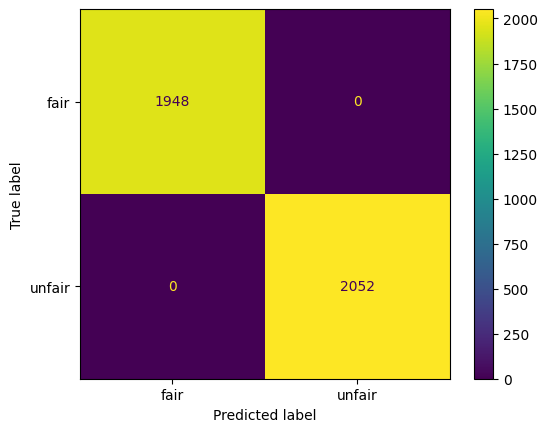

In [54]:
# drop time since machine cant train on DateTime type
X = fairness_data.drop(columns=['time', 'fairness'])
X_train, X_test, y_train, y_test = train_test_split(X, fairness_data.fairness, test_size = 0.2, random_state = 42)

logisticRegr = linear_model.LogisticRegression(max_iter=1000)

logisticRegr.fit(X_train, y_train)

pred = logisticRegr.predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
myconfusionmatrix = confusion_matrix(y_test, pred, labels = ['fair', 'unfair'])

disp = ConfusionMatrixDisplay(confusion_matrix=myconfusionmatrix,
                            display_labels= ['fair', 'unfair'])


disp.plot()

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr.score(X_test, y_test)))